<a href="https://colab.research.google.com/github/rimalearnia/test-python-skills/blob/main/checkpoint3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Preprocessing Part**


After importing the dataset using Pandas start by showing the head of the dataset

In [1255]:
import pandas as pd 
titanic=pd.read_csv("titanic-passengers.csv",sep=";")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


some general information about the data columns and values



In [1256]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [1257]:

titanic.shape

(891, 12)

In [1258]:
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C
888,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S
890,428,Yes,2,"Phillips, Miss. Kate Florence (""Mrs Kate Louis...",female,19.0,0,0,250655,26.0000,NaN,S


In [1259]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [1260]:
titanic.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


find missing informations 

In [1261]:
print(titanic['Age'].head())
print(titanic['Age'].head().isnull())

0    28.0
1    25.0
2    20.0
3    29.0
4    31.0
Name: Age, dtype: float64
0    False
1    False
2    False
3    False
4    False
Name: Age, dtype: bool


In [1262]:

titanic.isnull().sum().sum()

866

In [1263]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

replace them by the appropriate values.

In [1264]:
titanic1 =titanic.drop(['PassengerId','Cabin'],axis=1,inplace=True)
titanic1=titanic.dropna(axis=0,how='any',thresh=None,inplace=False)
titanic1.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,S
1,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,S
2,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,S
3,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,S
4,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,S


In [1265]:
titanic1.shape

(712, 10)

In [1266]:
titanic["Age"].fillna(titanic["Age"].mean(),inplace=True)

In [1267]:
titanic1["Survived"].value_counts()

No     424
Yes    288
Name: Survived, dtype: int64

In [1268]:
titanic1["Pclass"].value_counts()

/usr/local/lib/python3.7/dist-packages/IPython/core/displayhook.py:260: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  'Flushing oldest {cull_count} entries.'.format(sz=sz, cull_count=cull_count))


3    355
1    184
2    173
Name: Pclass, dtype: int64

In [1269]:
titanic1["Sex"].value_counts()

male      453
female    259
Name: Sex, dtype: int64

Verify that your data is ready to be treated.

In [1270]:
titanic1["Age"].isnull().sum()

0

In [1271]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
titanic1['Survived']=encoder.fit_transform(titanic1["Survived"])
titanic1.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,S
1,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,S
2,0,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,S
3,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,S
4,0,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,S


**Visualization part**

Start by studying the distribution of the most important features 

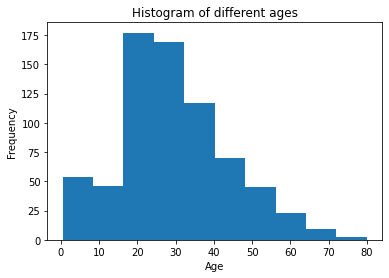

In [1272]:
import matplotlib.pyplot as plt
plt.title("Histogram of different ages")
plt.xlabel("Age")
titanic1["Age"].plot.hist()

 *Histograms Interpretation*

*  The age ranges from 0 to 80. 
*  Ages between 18 and 30 are quite frequent.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


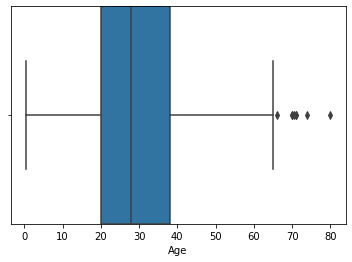

In [1273]:
import seaborn as sns 
sns.boxplot(titanic1["Age"],width=1)


*Box plot Information*

*   ages above 55 and below 2 are considered outlier

*   Maximum=55

*   Minimum=2

*   Median=30

*   Q1=22

*   Q3=35

*   Interquartile Range =Q3-Q1=35-22=13



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


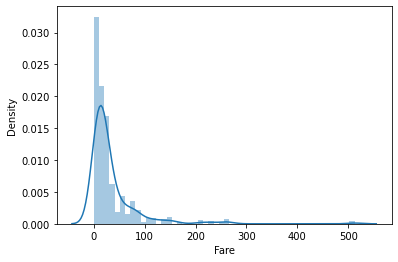

In [1274]:
sns.distplot(titanic1['Fare'])

according to the graph, we notice that the majority of passengers paid very little for their ticket with a few exceptions (500)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


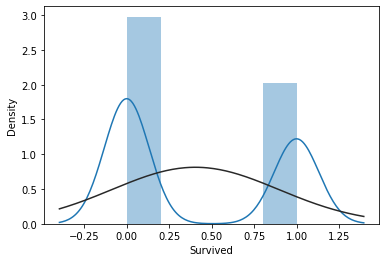

In [1275]:
from scipy.stats import norm
sns.distplot(titanic1["Survived"],fit=norm)

we notice that there are more dead than survivors

---





**Correlation**

Visualize the correlation between Sex and Age in a plot of your choosing, the visualized plot should give us obvious deductions concerning the importance of age and Sex in the survival of the individuals.

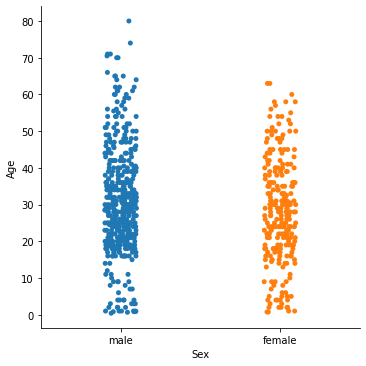

In [1276]:
sns.catplot(x='Sex',y='Age',data=titanic1)

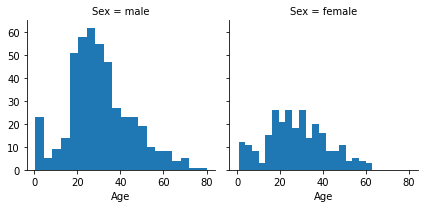

In [1277]:
g=sns.FacetGrid(titanic1,col="Sex")
g.map(plt.hist,"Age",bins=20)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


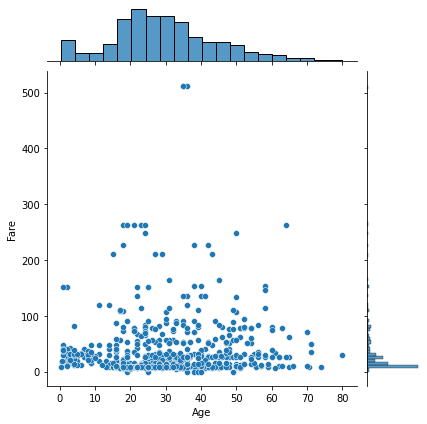

In [1278]:
sns.jointplot('Age','Fare',data=titanic1)

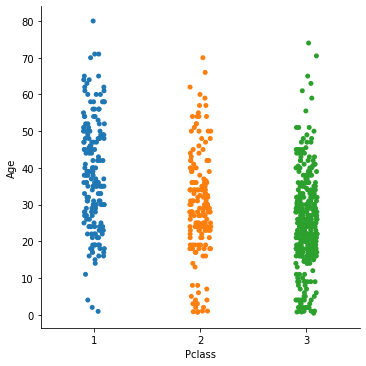

In [1279]:
sns.catplot(x='Pclass',y='Age',data=titanic1)

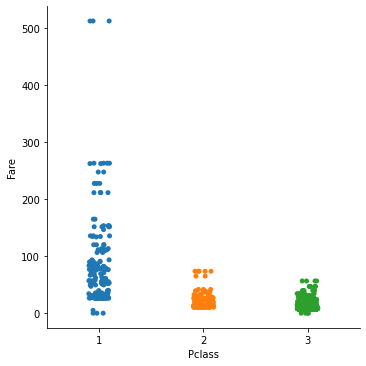

In [1280]:
sns.catplot(x='Pclass',y='Fare',data=titanic1)

 multiple plots



/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


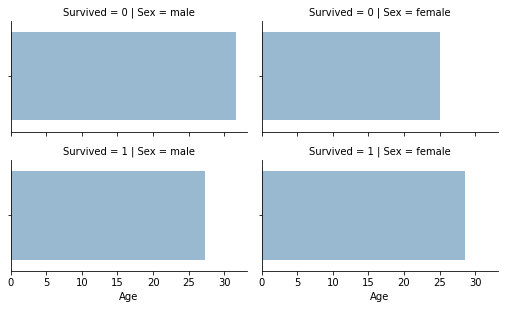

In [1281]:
grid = sns.FacetGrid(titanic1, row='Survived', col="Sex", size=2.2, aspect=1.6);
grid.map(sns.barplot, 'Age', alpha=.5, ci=None);
grid.add_legend();

Interpretation

*   men aged over 28 have all died

*   Overall, the survival rate of women is higher than that of men





Pick two other features and study their impact on the survival of the individuals 

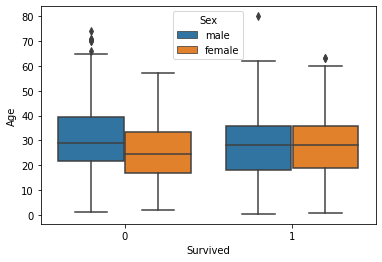

In [1282]:
sns.boxplot(x='Survived',y='Age',data=titanic1,hue='Sex')

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


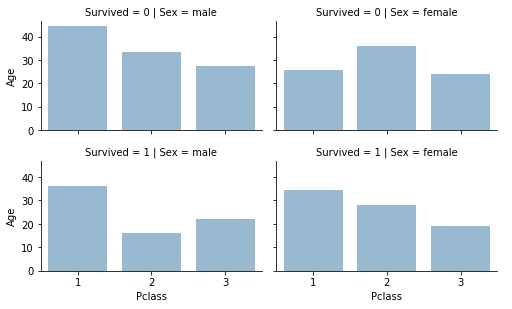

In [1283]:
grid = sns.FacetGrid(titanic1, row='Survived', col="Sex", size=2.2, aspect=1.6)
grid.map(sns.barplot, "Pclass", 'Age', alpha=.5, ci=None)
grid.add_legend()

Interpretation




*  the survival rate of class 2 passengers is lower than that of other classes


*  there were more deaths than survivors of male passengers in class 1 unlike women in class 1

*  the survival rate of class 3 passengers is slightly lower than the death rate of the same class




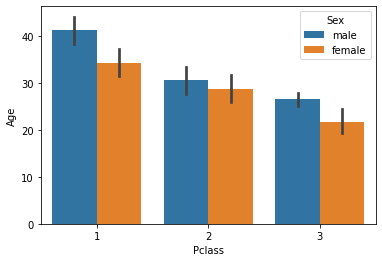

In [1284]:
sns.barplot(x='Pclass',y='Age',data=titanic1,hue='Sex')

**Try running the function**

In [1285]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )

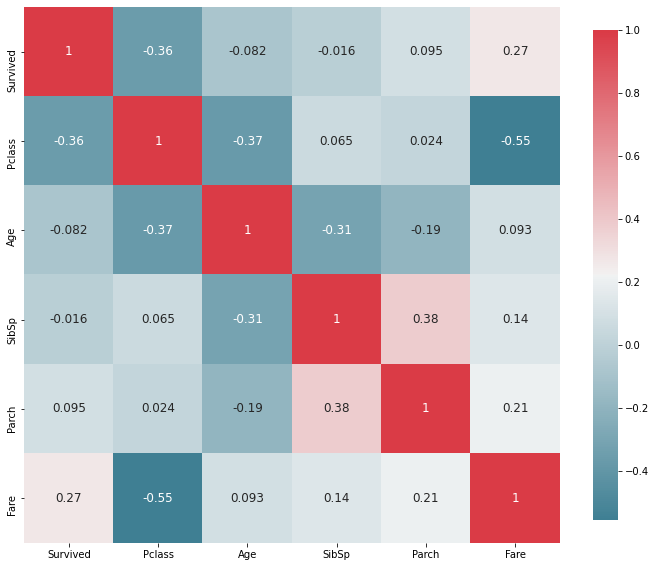

In [1286]:
plot_correlation_map( titanic1 )

Ce shema nous donne des informations sur la correlation entre chaque feature et label entre eux :

*   une forte correlation negative (-55% ) entre la classe (pclass) et le prix (fare )  .si on augmente la classe ,le prix diminue 
*   une correlation negative entre survived et pclass (-36%) .si on augmente la classe le taux de survie diminue 
*   une correlation positive entre le taux de survie (survived) et le prix (fare ) de l'ordre de 27% .quand le prix augente le taux de survie augmente 
*   une correlation positive entre parch et le prix .la presence des enfants et des parents influe positivement sur le prix 
*   pclass et age (-37%) ce qui signifie que si l'age augente le prix 
*   parch et sibsp (38%) .ces deux fea




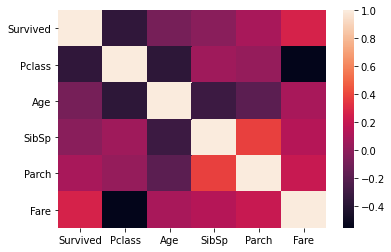

In [1287]:
sns.heatmap(titanic1.corr())

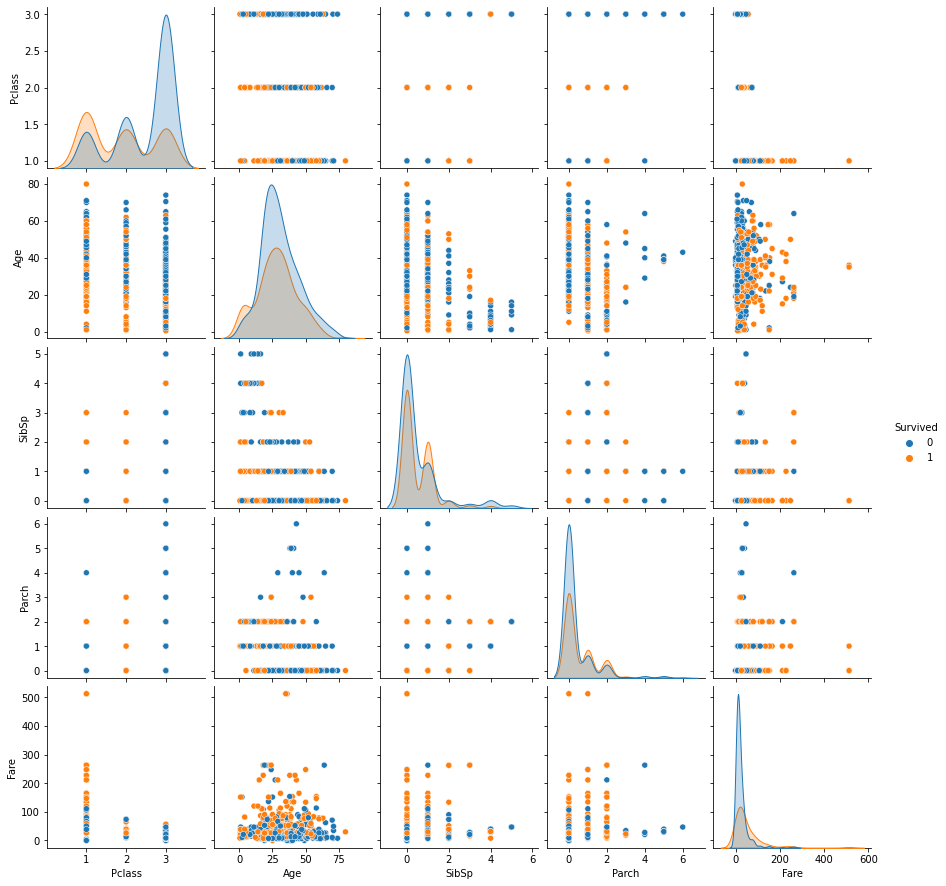

In [1288]:
sns.pairplot(titanic1,hue= "Survived")


Use the groupby function combined with the mean() to view the relation between Pclass and survived

In [1289]:

titanic1[["Pclass", "Survived"]].groupby(["Pclass"], as_index=True).mean()

,Survived
Pclass,
1,0.652174
2,0.479769
3,0.239437


your task now is to create a new column called Title which contain the appropriate Title for each individual ( hint : extract the title from the column Names)

In [1290]:
l = [name[name.find(',')+2: name.find('.')] for name in titanic1['Name']]
titanic2=titanic1
titanic2['title']=pd.DataFrame(l)
titanic2.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,title
0,0,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,S,Mr
1,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,S,Mr
2,0,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,S,Mr
3,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,S,Mrs
4,0,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,S,Mr


In [1291]:
titanic2['title'].value_counts()

Mr              311
Miss            123
Mrs              84
Master           29
Dr                6
Rev               6
Mlle              2
Major             2
Jonkheer          1
the Countess      1
Col               1
Ms                1
Lady              1
Name: title, dtype: int64

As a final step try to drop the useless columns such as Names

In [1292]:
titanic2.drop(['Name','Ticket','Embarked'],axis=1,inplace=True)
titanic2.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,title
0,0,2,male,28.0,0,0,13.0000,Mr
1,0,3,male,25.0,0,0,7.6500,Mr
2,0,3,male,20.0,0,0,7.8542,Mr
3,0,3,female,29.0,0,4,21.0750,Mrs
4,0,1,male,31.0,1,0,52.0000,Mr


Visualize the correlation between Title and other features(e.g Sex, Fare, Age...)

In [1293]:
pd.crosstab(titanic2["title"],titanic2["Sex"])

Sex,female,male
title,,
Col,0,1
Dr,3,3
Jonkheer,1,0
Lady,0,1
Major,1,1
Master,9,20
Miss,36,87
Mlle,2,0
Mr,117,194


In [1294]:
pd.crosstab(titanic2["title"],titanic2["Pclass"])

Pclass,1,2,3
title,,,
Col,0,0,1
Dr,2,2,2
Jonkheer,0,1,0
Lady,0,0,1
Major,1,0,1
Master,6,5,18
Miss,28,29,66
Mlle,0,2,0
Mr,78,75,158


on remarque que la distribution n'est pas  normale 

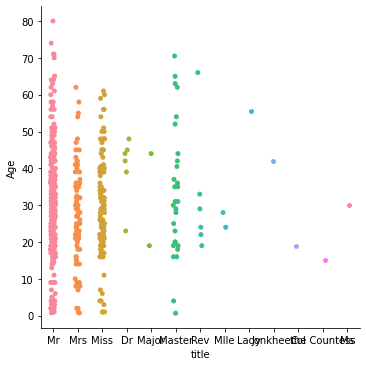

In [1295]:
sns.catplot(x='title',y='Age',data=titanic2)

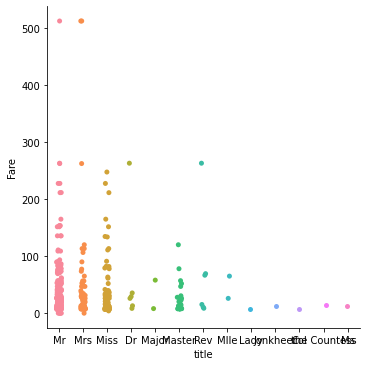

In [1296]:
sns.catplot(x='title',y='Fare',data=titanic2)

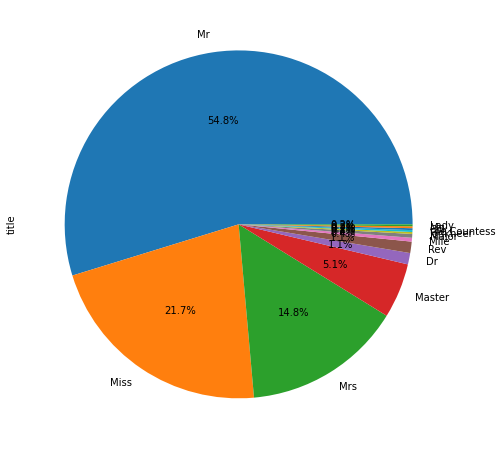

In [1297]:
plt.figure(figsize=(12,8))
titanic2['title'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

As you should've seen, there is a lot of titles which makes the feature not very practical, let's try to group these titles into more useful ones

hint: use the following dictionary

In [1298]:
Title_Dictionary = {

                    "Capt":       "Officer",

                    "Col":        "Officer",

                    "Major":      "Officer",

                      "Dr":         "Officer",

                    "Rev":        "Officer" ,

                    "Jonkheer":   "Royalty",

                    "Don":        "Royalty",

                    "Sir" :       "Royalty",

                   "Lady" :      "Royalty",

                  "the Countess": "Royalty",

                    "Dona":       "Royalty",

                    "Mme":        "Miss",

                    "Mlle":       "Miss",

                    "Miss" :      "Miss",

                    "Ms":         "Mrs",

                    "Mr" :        "Mrs",

                    "Mrs" :       "Mrs",

                    "Master" :    "Master"

                    }

In [1299]:
titanic2['Statut'] = titanic2['title'].map(Title_Dictionary,titanic2["title"]) 
titanic2.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,title,Statut
0,0,2,male,28.0,0,0,13.0000,Mr,Mrs
1,0,3,male,25.0,0,0,7.6500,Mr,Mrs
2,0,3,male,20.0,0,0,7.8542,Mr,Mrs
3,0,3,female,29.0,0,4,21.0750,Mrs,Mrs
4,0,1,male,31.0,1,0,52.0000,Mr,Mrs


let's visualize the same correlations using these new titles now.

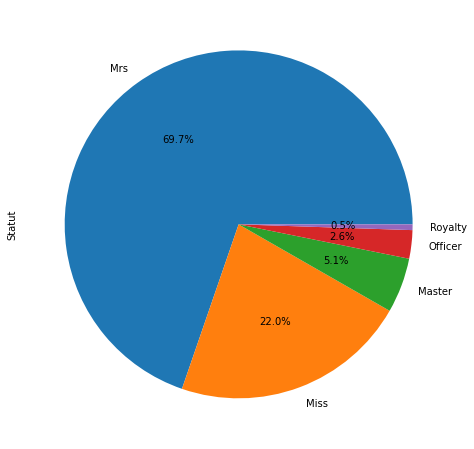

In [1300]:
plt.figure(figsize=(12,8))
titanic2['Statut'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

Finally, use the Parch and the SibSp columns to create a more useful feature, let's call it FamilySize.

In [1301]:
titanic2["FamilySize"]=titanic2['Parch'] +titanic2['SibSp']
titanic2.drop(["SibSp","Parch"],axis=1,inplace=True)
                         
titanic2.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Survived,Pclass,Sex,Age,Fare,title,Statut,FamilySize
0,0,2,male,28.0,13.0000,Mr,Mrs,0
1,0,3,male,25.0,7.6500,Mr,Mrs,0
2,0,3,male,20.0,7.8542,Mr,Mrs,0
3,0,3,female,29.0,21.0750,Mrs,Mrs,4
4,0,1,male,31.0,52.0000,Mr,Mrs,1


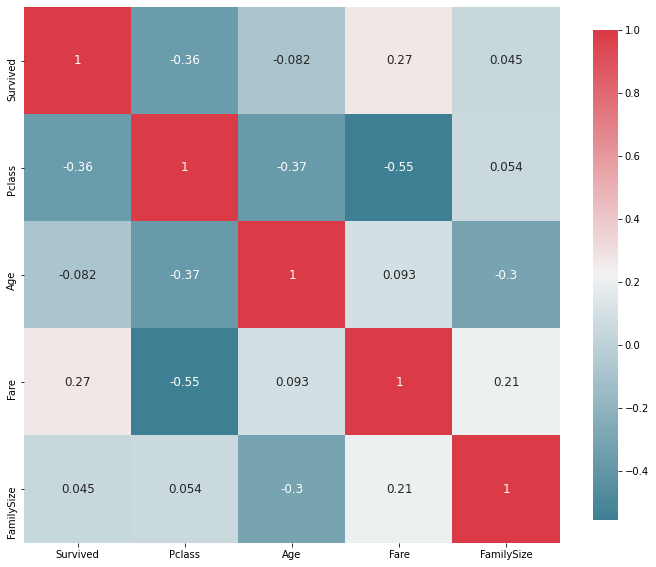

In [1302]:
plot_correlation_map( titanic2 )

on remarque qu'il y a une correlation positive  inferieur à 5% entre la taille d'une famille et le fait de survivre ou pas .on conclue qu'au final la taille d'une famille n'influe pas beaucoup sur le fait de survivre ou pas
je decide de ne pas garder cette feature 

In [1303]:
titanic2.drop(["FamilySize","title"],axis=1,inplace=True)
titanic2.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Survived,Pclass,Sex,Age,Fare,Statut
0,0,2,male,28.0,13.0000,Mrs
1,0,3,male,25.0,7.6500,Mrs
2,0,3,male,20.0,7.8542,Mrs
3,0,3,female,29.0,21.0750,Mrs
4,0,1,male,31.0,52.0000,Mrs


In [1304]:
one_hot=pd.get_dummies(titanic2["Statut"])
titanic_final=titanic2.join(one_hot)
titanic_final.head()

,Survived,Pclass,Sex,Age,Fare,Statut,Master,Miss,Mrs,Officer,Royalty
0,0,2,male,28.0,13.0000,Mrs,0,0,1,0,0
1,0,3,male,25.0,7.6500,Mrs,0,0,1,0,0
2,0,3,male,20.0,7.8542,Mrs,0,0,1,0,0
3,0,3,female,29.0,21.0750,Mrs,0,0,1,0,0
4,0,1,male,31.0,52.0000,Mrs,0,0,1,0,0


In [1305]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
titanic_final["Sex"]=encoder.fit_transform(titanic_final["Sex"])
titanic_final.head()

,Survived,Pclass,Sex,Age,Fare,Statut,Master,Miss,Mrs,Officer,Royalty
0,0,2,1,28.0,13.0000,Mrs,0,0,1,0,0
1,0,3,1,25.0,7.6500,Mrs,0,0,1,0,0
2,0,3,1,20.0,7.8542,Mrs,0,0,1,0,0
3,0,3,0,29.0,21.0750,Mrs,0,0,1,0,0
4,0,1,1,31.0,52.0000,Mrs,0,0,1,0,0


In [1306]:
titanic_final.drop("Statut",axis=1,inplace=True)
titanic_final.head()

,Survived,Pclass,Sex,Age,Fare,Master,Miss,Mrs,Officer,Royalty
0,0,2,1,28.0,13.0000,0,0,1,0,0
1,0,3,1,25.0,7.6500,0,0,1,0,0
2,0,3,1,20.0,7.8542,0,0,1,0,0
3,0,3,0,29.0,21.0750,0,0,1,0,0
4,0,1,1,31.0,52.0000,0,0,1,0,0
